detected contours (RETR_EXTERNAL): '43' 
detected contours (RETR_LIST): '58' 


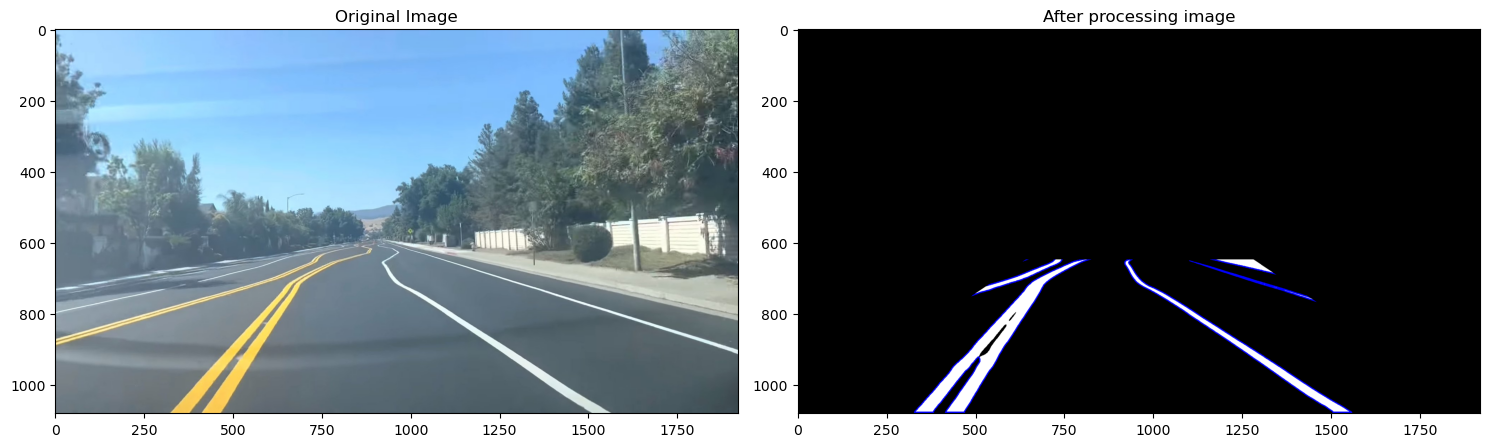

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Reading the image
img = cv2.imread('Lane Lines - Medium Difficulty Image 1.jpg')

# Converting from BGR color space to RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Getting the dimensions of the image
(h, w, c) = img.shape

# Convert the image to grayscale:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Defining Color Quantization for k-means clustering
def color_quantization(image, k):

    # Transform image into 'data':
    data = np.float32(image).reshape((-1, 3))
    # print(data.shape)

    # Define the algorithm termination criteria (the maximum number of iterations and/or the desired accuracy):
    # In this case the maximum number of iterations is set to 20 and epsilon = 1.0
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    # Apply K-means clustering algorithm:
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # At this point we can make the image with k colors
    # Convert center to uint8:
    center = np.uint8(center)
    # Replace pixel values with their center value:
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

#  Blurs the image using a Gaussian filter to eliminate noise
gray_image_blurred = cv2.GaussianBlur(gray_image, (25, 25), 0)

# Otsu's binarization algorithm:
ret, th = cv2.threshold(gray_image_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

gray_image_blurred = cv2.cvtColor(th, cv2.COLOR_GRAY2RGB)

# # Applying k-means clustering to the image    
# k_means_img = color_quantization(gray_image_blurred, 3)

def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""

    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Show the number of detected contours for each call:
print("detected contours (RETR_EXTERNAL): '{}' ".format(len(contours)))
print("detected contours (RETR_LIST): '{}' ".format(len(contours2)))

# Copy image to show the results:
image_contours = gray_image_blurred.copy()
image_contours_2 = gray_image_blurred.copy()

# Draw the outline of all detected contours:
draw_contour_outline(image_contours, contours, (0, 0, 255), 5)
draw_contour_outline(image_contours_2, contours2, (255, 0, 0), 5)

# Creating a mask to exclude everything except the region of interest
mask = np.zeros(image_contours.shape[:2], dtype="uint8")
cv2.fillPoly(mask, np.array( \
   [[(int(w/3), int(h*6/10)), (0, h), (w, h), (int(w*2/3), int(h*6/10))]]), (255, 255, 255))
masked = cv2.bitwise_and(image_contours, gray_image_blurred, mask=mask)

# Plotting before and after image for pipeline
plt.subplots(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(masked)
plt.title("After processing image")
plt.tight_layout()
plt.show()